In [1]:
import pandas as pd
import numpy as np


In [2]:
import os
#import numpy as np # Linear Algebra
#import pandas as pd # Data Manipulation
pd.set_option('MAX_ROWS', None) # Setting pandas to display a N number of columns
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn import tree # Modelling a tree
from sklearn.impute import SimpleImputer # Perform Imputation
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict # Cross Validation
from sklearn.linear_model import LogisticRegression # Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model
from sklearn.model_selection import train_test_split
#warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive' , force_remount= True)

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [42]:
Df_2019=pd.read_csv('/content/drive/MyDrive/Jan_2019_ontime.csv')
Df_2020=pd.read_csv('/content/drive/MyDrive/Jan_2019_ontime.csv')
Df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [43]:
#Checking if the bases have the same columns
print(set(Df_2019.columns) == set(Df_2020.columns))

        #Generating the unique base
df = pd.concat([Df_2019,Df_2020])

print(df.shape)
df.head()

True
(1167970, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [ ]:
# set_res = set(df.OP_UNIQUE_CARRIER)
# set_res2 = set(df.ORIGIN)
# set_res3 = set(df.DEST ) 

# list_res = (list(set_res))
# list_res2 = (list(set_res2))
# list_res3 = (list(set_res3))
 
# for item in list_res: 
#     print("OP_UNIQUE_CARRIER")
#     print(item) 

# for item2 in list_res2: 
#     print("ORIGIN")
#     print(item2) 
# for item3 in list_res3: 
#     print("DEST")
#     print(item3) 

In [44]:
#concatenate the arrival and departure delay 
df['DELAYED'] = (df['ARR_DEL15'].astype(bool) | df['DEP_DEL15'].astype(bool)).astype(int)

# not remove DAY_OF_WEEK
#decrease dimensions
df.drop(['OP_CARRIER_AIRLINE_ID','DAY_OF_WEEK','DEP_TIME_BLK','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID',
         'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21','OP_CARRIER','ARR_DEL15','DEP_DEL15','CANCELLED', 'DIVERTED'], axis=1, inplace=True)

# check object columns
strings_columns =  list(df.dtypes[df.dtypes == 'object'].index)
print(f"The number of string columns is: {len(strings_columns)}")
    
# float columns
numeric_columns = list(df.drop(strings_columns,axis=1))
print(f"The number of numeric columns is: {len(numeric_columns)}")


The number of string columns is: 3
The number of numeric columns is: 5


In [45]:
df.head()

,DAY_OF_MONTH,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,ARR_TIME,DISTANCE,DELAYED
0,1,9E,GNV,ATL,601.0,722.0,300.0,0
1,1,9E,MSP,CVG,1359.0,1633.0,596.0,0
2,1,9E,DTW,CVG,1215.0,1329.0,229.0,0
3,1,9E,TLH,ATL,1521.0,1625.0,223.0,0
4,1,9E,ATL,FSM,1847.0,1940.0,579.0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167970 entries, 0 to 583984
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   DAY_OF_MONTH       1167970 non-null  int64  
 1   OP_UNIQUE_CARRIER  1167970 non-null  object 
 2   ORIGIN             1167970 non-null  object 
 3   DEST               1167970 non-null  object 
 4   DEP_TIME           1135266 non-null  float64
 5   ARR_TIME           1133848 non-null  float64
 6   DISTANCE           1167970 non-null  float64
 7   DELAYED            1167970 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 80.2+ MB


In [47]:
# check object columns
strings_columns =  list(df.dtypes[df.dtypes == 'object'].index)
print(f"The number of string columns is: {len(strings_columns)}")
    
# float columns
numeric_columns = list(df.drop(strings_columns,axis=1))
print(f"The number of numeric columns is: {len(numeric_columns)}")


The number of string columns is: 3
The number of numeric columns is: 5


In [10]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# import matplotli
import matplotlib.pyplot as plt

In [48]:
from sklearn.metrics.pairwise import normalize

set_res2 = set(df.ORIGIN)
set_res3 = set(df.DEST ) 

list_res2 = (list(set_res2))
list_res3 = (list(set_res3))
 
# for item2 in list_res2: 
#     print("ORIGIN")
#     print(item2) 

# for item3 in list_res3: 
#     print("DEST")
#     print(item3) 


# item_counts = df["set_res2"].value_counts()
# print(item_counts)
# df['ORIGIN'].nlargest(2)
# pd.value_counts(df["ORIGIN"])

# df['ORIGIN'].value_counts(normalize=True) * 100

s = df.ORIGIN

precent = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
precent

ATL    5.3%
ORD    4.5%
DFW    3.9%
CLT    3.3%
DEN    3.2%
LAX    3.1%
PHX    2.5%
IAH    2.5%
LGA    2.4%
SFO    2.3%
LAS    2.3%
MSP    2.1%
DTW    2.1%
MCO    2.1%
DCA    2.0%
BOS    2.0%
EWR    1.8%
JFK    1.8%
SEA    1.8%
SLC    1.6%
PHL    1.6%
FLL    1.5%
MIA    1.4%
BWI    1.3%
SAN    1.3%
TPA    1.1%
MDW    1.1%
DAL    1.1%
BNA    1.1%
STL    0.9%
IAD    0.9%
HOU    0.9%
AUS    0.8%
SJC    0.8%
RDU    0.8%
PDX    0.8%
MSY    0.8%
MCI    0.8%
OAK    0.7%
SMF    0.7%
PIT    0.7%
HNL    0.7%
CLE    0.7%
IND    0.7%
RSW    0.7%
CVG    0.6%
CMH    0.6%
SNA    0.6%
SAT    0.6%
JAX    0.5%
MKE    0.4%
PBI    0.4%
BDL    0.4%
BUR    0.4%
SJU    0.4%
OGG    0.4%
OMA    0.3%
MEM    0.3%
RIC    0.3%
ORF    0.3%
BUF    0.3%
OKC    0.3%
SDF    0.3%
TUS    0.3%
ABQ    0.3%
CHS    0.3%
ONT    0.3%
BOI    0.3%
RNO    0.3%
GRR    0.3%
BHM    0.2%
TUL    0.2%
DSM    0.2%
PVD    0.2%
TYS    0.2%
ELP    0.2%
PSP    0.2%
ANC    0.2%
GSO    0.2%
LGB    0.2%
KOA    0.2%
GSP    0.2%
SAV    0.2%
LIH 

In [49]:
s = df.DEST

precent = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
precent

ATL    5.3%
ORD    4.5%
DFW    4.0%
CLT    3.3%
DEN    3.2%
LAX    3.1%
PHX    2.5%
IAH    2.5%
LGA    2.4%
SFO    2.3%
LAS    2.3%
MSP    2.1%
DTW    2.1%
MCO    2.1%
DCA    2.0%
BOS    2.0%
EWR    1.8%
JFK    1.8%
SEA    1.8%
SLC    1.6%
PHL    1.6%
FLL    1.5%
MIA    1.4%
BWI    1.3%
SAN    1.3%
TPA    1.1%
MDW    1.1%
DAL    1.1%
BNA    1.1%
STL    0.9%
IAD    0.9%
HOU    0.9%
AUS    0.8%
SJC    0.8%
PDX    0.8%
RDU    0.8%
MSY    0.8%
MCI    0.8%
OAK    0.7%
SMF    0.7%
PIT    0.7%
HNL    0.7%
CLE    0.7%
IND    0.7%
RSW    0.7%
CVG    0.6%
CMH    0.6%
SNA    0.6%
SAT    0.6%
JAX    0.5%
MKE    0.4%
PBI    0.4%
BDL    0.4%
BUR    0.4%
SJU    0.4%
OGG    0.4%
OMA    0.3%
RIC    0.3%
MEM    0.3%
ORF    0.3%
BUF    0.3%
OKC    0.3%
SDF    0.3%
TUS    0.3%
ABQ    0.3%
CHS    0.3%
ONT    0.3%
BOI    0.3%
RNO    0.3%
GRR    0.3%
BHM    0.2%
TUL    0.2%
DSM    0.2%
PVD    0.2%
TYS    0.2%
ELP    0.2%
PSP    0.2%
ANC    0.2%
GSO    0.2%
LGB    0.2%
GSP    0.2%
KOA    0.2%
SAV    0.2%
LIH 

Origin And Dest Categorical Value Convert to Numarical - OneHot Encording

Origin And Dest have Highest precentage

In [50]:
def add_company(inpt):
    if inpt == 'ATL' or inpt == 'ORD':
        return inpt
    else:
        return 'Other'



In [51]:
df['ORIGIN'] = df['ORIGIN'].apply(add_company)

In [52]:
df['DEST'] = df['DEST'].apply(add_company)

In [53]:
y = df.OP_UNIQUE_CARRIER

precent = y.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
precent

WN    19.1%
AA    13.2%
DL    12.6%
OO    11.1%
UA     8.0%
YX     4.4%
MQ     4.4%
B6     4.2%
OH     4.0%
AS     3.6%
9E     3.5%
YV     3.1%
NK     2.6%
EV     2.3%
F9     1.7%
HA     1.2%
G4     1.2%
Name: OP_UNIQUE_CARRIER, dtype: object

In [54]:
# to get percentage of null values on the whole data

(df.isna().sum() / df.shape[0]) * 100

DAY_OF_MONTH         0.000000
OP_UNIQUE_CARRIER    0.000000
ORIGIN               0.000000
DEST                 0.000000
DEP_TIME             2.800072
ARR_TIME             2.921479
DISTANCE             0.000000
DELAYED              0.000000
dtype: float64

Remove Null Values

In [55]:
df.dropna(inplace=True)

# check
df.isna().any()



DAY_OF_MONTH         False
OP_UNIQUE_CARRIER    False
ORIGIN               False
DEST                 False
DEP_TIME             False
ARR_TIME             False
DISTANCE             False
DELAYED              False
dtype: bool

Remove Duplicate

In [56]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)

# check
df.duplicated().sum()


0

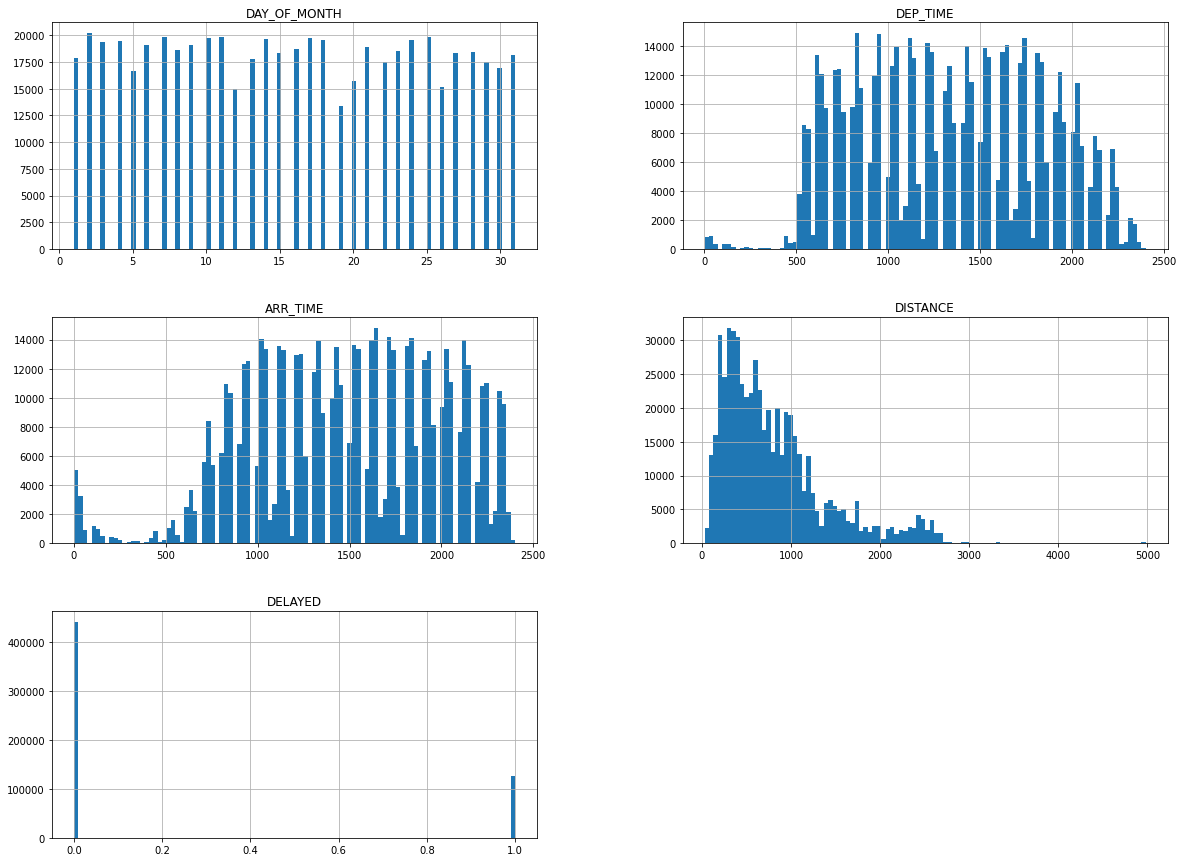

In [57]:
df.hist(bins=100,figsize=(20,15))
plt.grid()
plt.show()

In [58]:
# function to check outliers with box plot
def check_outliers(df):
  for col in numeric_columns:
    fig,ax= plt.subplots(figsize=(10,5))
    plt.grid() 
    sns.boxplot(x = df[col])
    plt.show()

# Function to replace outliers with mean
def replace_outliers(df):
    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        upper_lim = q3 + 1.5 * iqr
        lower_lim = q1 - 1.5 * iqr
        column_mean = df[column].mean()
        outliers_down = (df[column] < lower_lim)
        outliers_up = (df[column] > upper_lim)
        df[column] = np.where((df[column] > upper_lim) | (df[column] < lower_lim) , column_mean, df[column])
        df[column] = pd.DataFrame(df[column],columns=[column])
    return (df)

In [35]:
from sklearn.preprocessing import LabelEncoder

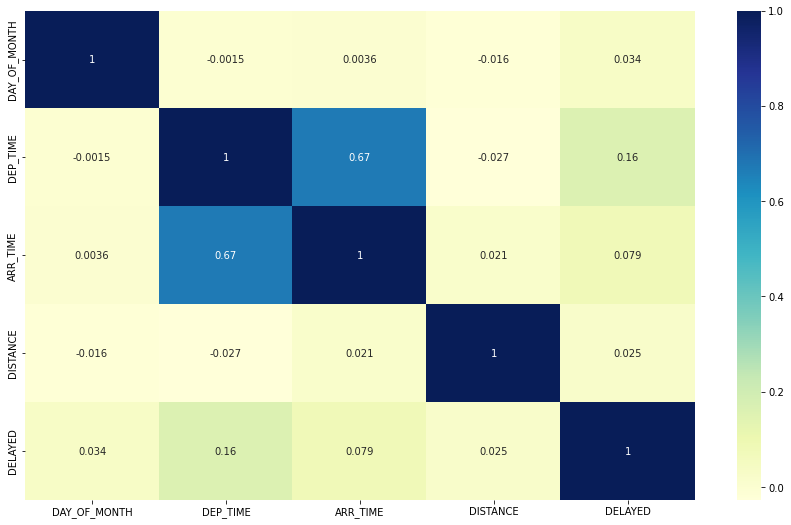

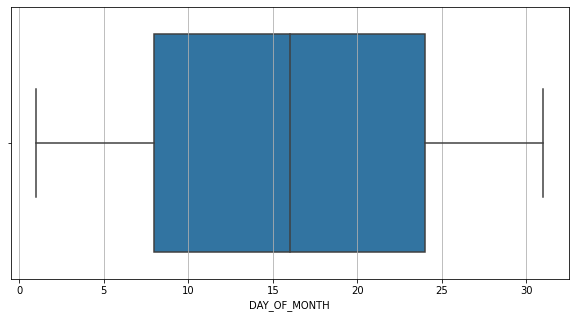

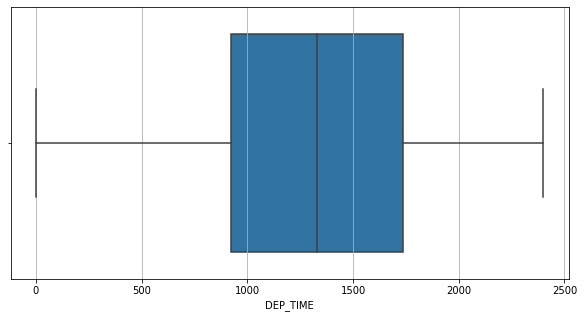

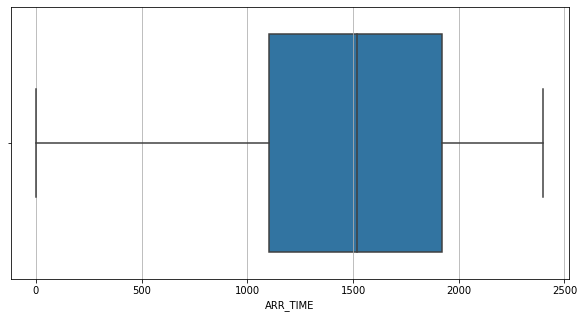

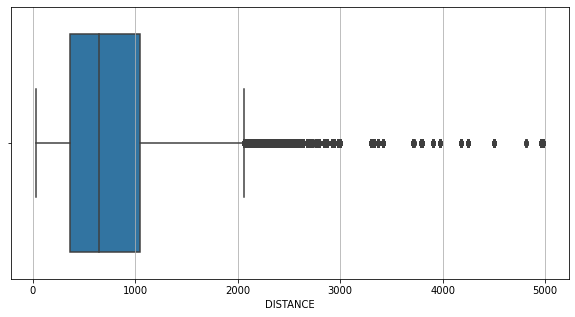

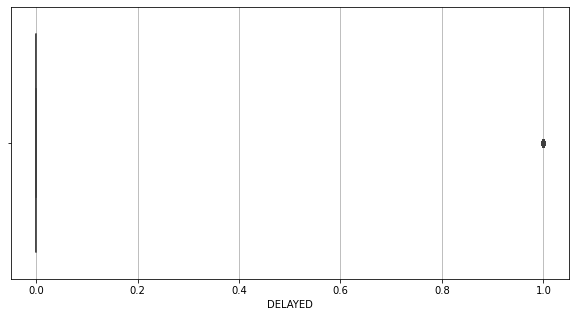

In [59]:
#replace_outliers(df)

fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

def encode_categories(features):
    lb_make = LabelEncoder()
    for i in range(len(features)):
        df[features[i]] = lb_make.fit_transform(df[features[i]])

# after preparing data, we have to make the final check before entering modeling phase
df.isna().sum()

df.duplicated().sum()

check_outliers(df)


In [60]:
# As there is a correlation between the folloing encoded column and label so, we will encode them and drag them to the model
encode_categories(['OP_UNIQUE_CARRIER' , 'ORIGIN' , 'DEST'])

check corretaion

In [61]:
df.corr()['DELAYED']

DAY_OF_MONTH         0.033734
OP_UNIQUE_CARRIER    0.006353
ORIGIN               0.000075
DEST                 0.015459
DEP_TIME             0.159288
ARR_TIME             0.078731
DISTANCE             0.024893
DELAYED              1.000000
Name: DELAYED, dtype: float64

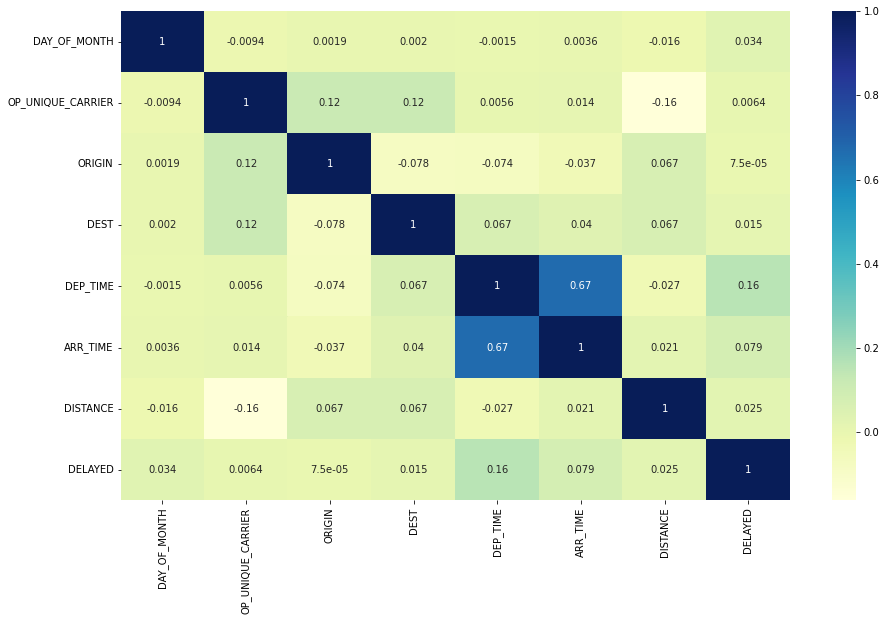

In [62]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

Model Build

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.neighbors import KNeighborsRegressor

In [63]:
X = df.drop('DELAYED',axis=1)
y = df['DELAYED']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

for name, model in models:
    
    print(name)
    
    # Make predictions.
    
    trained_model = model.fit(x_train, y_train)
        
    predictions = trained_model.predict(x_test) 
    
    print(f"train score: {accuracy_score(y_train, trained_model.predict(x_train))}\n")
    
    print(f"test score: {accuracy_score(predictions,y_test)}\n\n")

LogisticRegression
train score: 0.7778575766510177

test score: 0.7768931799072152


RandomForest
train score: 0.9999697604269828

test score: 0.8162002928188815


Decision Tree
train score: 0.9999974800355819

test score: 0.7482639603459732


KNN
train score: 0.8600688958271909

test score: 0.8108260667603531




High Accuracy get from RandomForest 

So Random Forest Use to train Model

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
trained_model = rf.fit(x_train, y_train)
trained_model.fit(x_train, y_train)  


predictions = trained_model.predict(x_test) 
rf_old_train = accuracy_score(y_train, trained_model.predict(x_train))
pred = rf.predict(x_test)
rf_old_accur = accuracy_score(y_test, pred)


# Hyper parameter Tuning
# new accuracy
# rf = RandomForestClassifier(n_estimators=150, min_samples_split=5, max_features='sqrt', max_depth=20)

# rf.fit(x_train,y_train)
# trained_model = rf.fit(x_train, y_train)
# trained_model.fit(x_train, y_train)  
# predictions = trained_model.predict(x_test) 
# rf_new_train = accuracy_score(y_train, trained_model.predict(x_train))
# pred = rf.predict(x_test)
# rf_new_accur = accuracy_score(y_test, pred)

print("The Training Accuracy of RandomForest Model before tuning: " + str(rf_old_train))
print("The Testing Accuracy of RandomForest Model before tuning: " + str(rf_old_accur))
print()
# print("The Training Accuracy of RandomForest Model after tuning: " + str(rf_new_train))
# print("The Testing Accuracy of RandomForest Model after tuning: " + str(rf_new_accur))
# print()


The Training Accuracy of RandomForest Model before tuning: 0.9999848802134914
The Testing Accuracy of RandomForest Model before tuning: 0.8154594257692376



In [65]:
x_train.columns

Index(['DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_TIME',
       'ARR_TIME', 'DISTANCE'],
      dtype='object')

In [ ]:
import pickle
with open('modelFDM.pickle', 'wb') as file:
    pickle.dump(trained_model, file)

In [ ]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,ARR_TIME,DISTANCE,year,DELAYED
0,1,2,0,2,0,601.0,722.0,300.0,2019,0
1,1,2,0,2,2,1359.0,1633.0,596.0,2019,0
2,1,2,0,2,2,1215.0,1329.0,229.0,2019,0
3,1,2,0,2,0,1521.0,1625.0,223.0,2019,0
4,1,2,0,0,2,1847.0,1940.0,579.0,2019,0


In [ ]:
pred_value = trained_model.predict([[1,	2,	0,	2,	0,	601.0,	722.0,	300.0,	2019	]])
pred_value

array([0])

In [ ]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,ARR_TIME,DISTANCE,year,DELAYED
0,1,2,0,2,0,601.0,722.0,300.0,2019,0
1,1,2,0,2,2,1359.0,1633.0,596.0,2019,0
2,1,2,0,2,2,1215.0,1329.0,229.0,2019,0
3,1,2,0,2,0,1521.0,1625.0,223.0,2019,0
4,1,2,0,0,2,1847.0,1940.0,579.0,2019,0
